In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("..")
from config import *
from scripts.SNR import SNR
from scripts.plot_images import plot_images
from scripts.plot_line_defect import plot_line
from scripts.Amp_phase_func import *
from scripts.plot_rect import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
loaded_node_temp= pd.read_pickle(Dict_temp_0_071)
loaded_nodes_loc=pd.read_pickle(Nodes_loc_0_071)

In [3]:
#loaded_node_temp.keys()

In [4]:
images=[21.101, 24.621, 28.101, 30.721]
img= [8.2803, 9.6803, 10.98, 12.48]

In [5]:
#for i in images:
   #grid_temperature, x_min, x_max, y_min, y_max, grid_x, grid_y= plot_images(loaded_node_temp[i] , loaded_nodes_loc, label="Temperature", plot_image=True)
   #break

In [6]:
#plot_line(loaded_nodes_loc, loaded_node_temp[21.101], fixed_y=0.15, label="Temperature")

# Thermal Image at frequency 0.071 Hz and time 21.13 sec, for the temperature distribution profile along the line A-A 

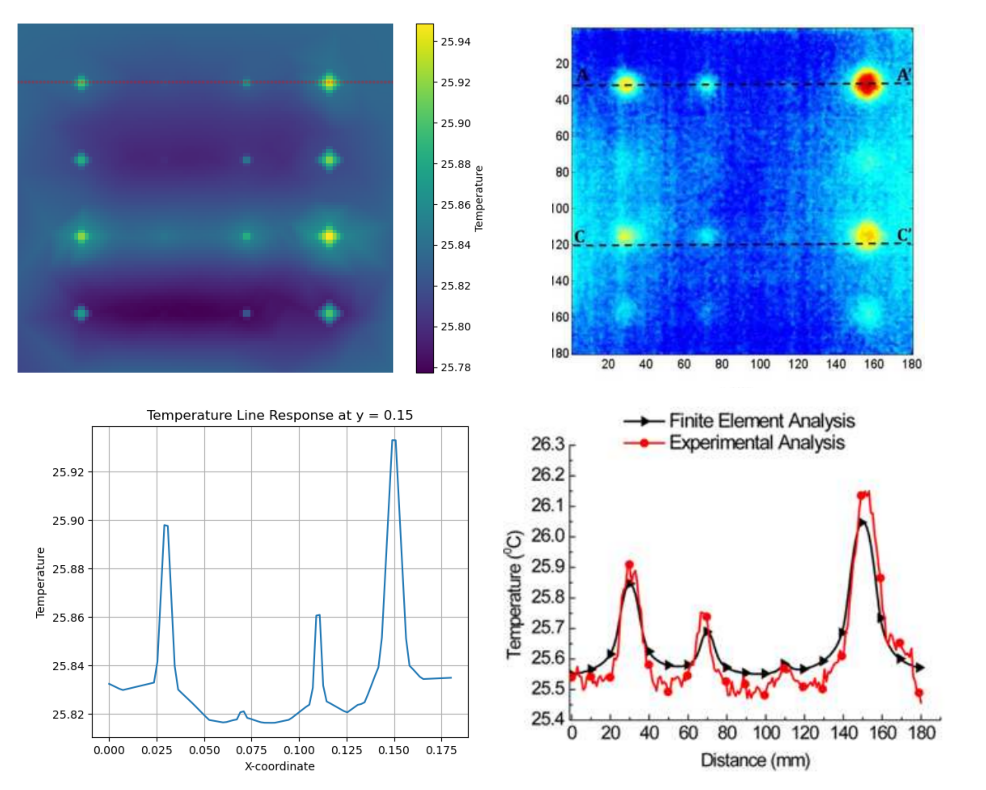

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the images
image_paths = ['1.png', '0.071.png','2.png', 'Responce_paper.png']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Loop through the images and axes to plot them
for i, ax in enumerate(axes.flat):
    if i < len(image_paths):
        img = mpimg.imread(image_paths[i])
        ax.imshow(img)
    ax.axis('off')
#fig.suptitle('Thermal Image at frequency 0.071 Hz and time 21.13 sec, for the temperature distribution profile along the line A-A ', fontsize=16)

plt.tight_layout()
plt.show()


## 0.071

In [8]:
df= pd.read_csv(result_df).dropna()

In [9]:
Amp=df[["df_0_071.csv_Amplitude"]].values
Phase=df[["df_0_071.csv_Phase"]].values

In [10]:
#plot_images(Amp , loaded_nodes_loc,label="Amplitude", plot_image=True)
#plot_images(Phase , loaded_nodes_loc,label="Phase", plot_image=True)

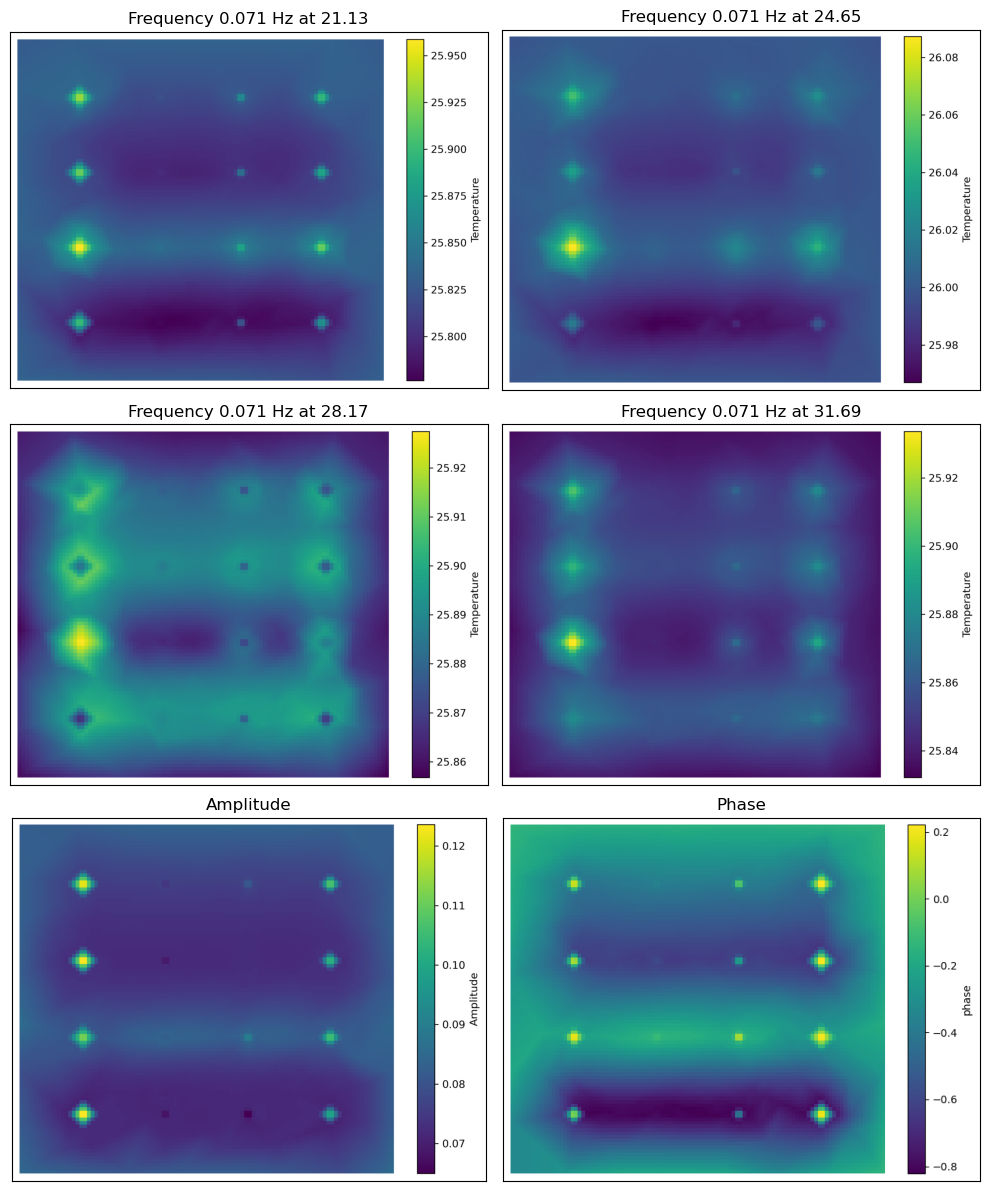

In [11]:
image1 = mpimg.imread('temperature_plot_21.101.png')
image2 = mpimg.imread('temperature_plot_24.621.png')
image3 = mpimg.imread('temperature_plot_28.101.png')
image4 = mpimg.imread('temperature_plot_30.721.png')
image5 = mpimg.imread('Amp.png')
image6 = mpimg.imread('Phase.png')

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 12))

# Plot your images in the respective subplots
axes[0, 0].imshow(image1, cmap='viridis')
axes[0, 0].set_title('Frequency 0.071 Hz at 21.13')

axes[0, 1].imshow(image2, cmap='viridis')
axes[0, 1].set_title('Frequency 0.071 Hz at 24.65')

axes[1, 0].imshow(image3, cmap='viridis')
axes[1, 0].set_title('Frequency 0.071 Hz at 28.17')

axes[1, 1].imshow(image4, cmap='viridis')
axes[1, 1].set_title('Frequency 0.071 Hz at 31.69')

axes[2, 0].imshow(image5, cmap='viridis')
axes[2, 0].set_title('Amplitude')

axes[2, 1].imshow(image6, cmap='viridis')
axes[2, 1].set_title('Phase')

# Remove axis labels
for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [12]:
df= pd.read_csv(result_df)

In [13]:
Amp=df[["df_0_071.csv_Amplitude"]].dropna().values
Phase=df[["df_0_071.csv_Phase"]].dropna().values
loaded_nodes_loc=pd.read_pickle(Nodes_loc_0_071)

In [15]:
#plot_images(Phase, loaded_nodes_loc, label="phase", plot_image=True)

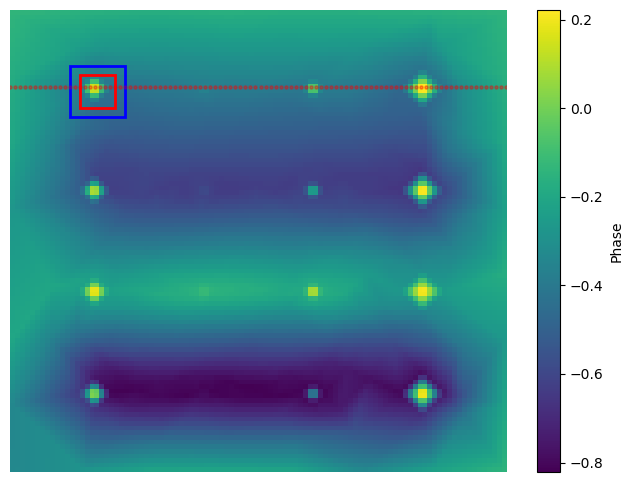

In [16]:
snr, phase_d= SNR(loaded_nodes_loc, Phase, fixed_y=0.15, fixed_x=0.032, rect_size=3.5, margin=1, label="Phase")

# SNR

In [17]:

phase_diff = [1.50715567, 1.05716558, 0.7217959,0.17816703,0.48854467, 0.51666469 , 0.3556739]
df_snr = pd.DataFrame()
freq=[0.028, 0.038, 0.055, 0.071, 0.093,.126,0.182]
data_list = [10.86, 6.7336116542902555, 7.1120674144401175, 0.42759167244766294, 2.2967046489427516, 1.4576292355218046, 3.8464388144884953]
SNR_Of_Phase = [6.9626572661194714, 15.451489035645219, 17.089211965196366, 6.199179734657986, 9.13354931317712, 7.528130932295111,  2.4688416109617]
df_snr = pd.DataFrame({'Freq': freq, 'Phase_difference': phase_diff, 'SNR_For_Amplitude': data_list, 'SNR_For_Phase': SNR_Of_Phase})

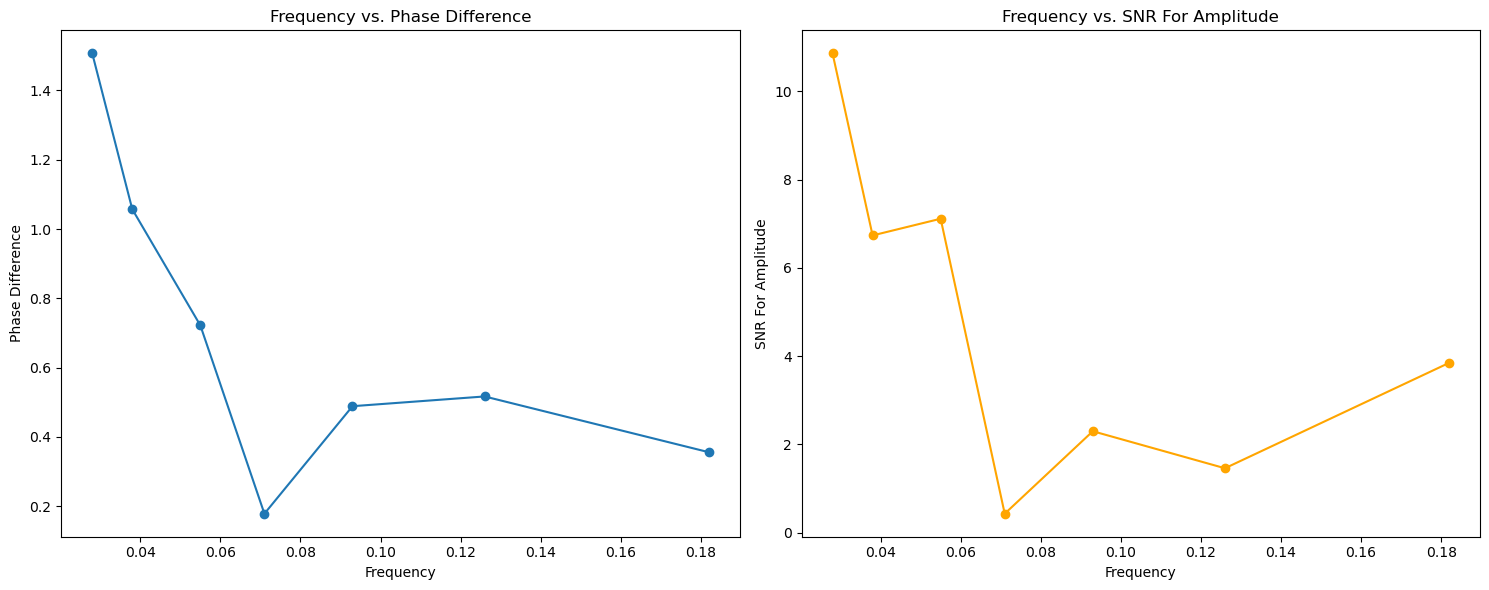

In [18]:

fig, axs = plt.subplots(1, 2, figsize=(15, 6))


axs[0].plot(df_snr['Freq'], df_snr['Phase_difference'], marker='o')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Phase Difference')
axs[0].set_title('Frequency vs. Phase Difference')


axs[1].plot(df_snr['Freq'], df_snr['SNR_For_Amplitude'], marker='o', color='orange')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('SNR For Amplitude')
axs[1].set_title('Frequency vs. SNR For Amplitude')

plt.tight_layout()
plt.show()